# Phase 3: Baseline Model Development

In this notebook, we establish a performance baseline using Logistic Regression. 
A baseline is critical because it tells us:
1. Is the problem solvable? (Metric > 0.5)
2. How much better are complex models (like Random Forest) actually performing?

### 1. Setup & Data Loading

In [1]:
import pandas as pd
import numpy as np
import sys
import os

# Add src to path
sys.path.append(os.path.abspath('..'))

from src.config import PROCESSED_DATA_DIR
from src.model_training import train_baseline_model, evaluate_model_cv, evaluate_model_test, plot_model_performance

# Load processed data
X_train = pd.read_csv(PROCESSED_DATA_DIR / 'X_train.csv')
X_test = pd.read_csv(PROCESSED_DATA_DIR / 'X_test.csv')
y_train = pd.read_csv(PROCESSED_DATA_DIR / 'y_train.csv').values.ravel()
y_test = pd.read_csv(PROCESSED_DATA_DIR / 'y_test.csv').values.ravel()

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")

Train Shape: (5616, 30)
Test Shape: (1405, 30)


### 2. Train Baseline Model (Logistic Regression)
We use `class_weight='balanced'` to handle the churn imbalance we identified in Phase 1.

In [2]:
# Train Model
baseline_model = train_baseline_model(X_train, y_train, class_weight='balanced')

# Check coefficients (Interpretability)
# This shows US which features drive churn linearly
coeffs = pd.Series(baseline_model.coef_[0], index=X_train.columns)
print("Top 5 Positive Coefficients (Increases Churn Risk):")
print(coeffs.sort_values(ascending=False).head(5))

print("\nTop 5 Negative Coefficients (Reduces Churn Risk):")
print(coeffs.sort_values(ascending=True).head(5))

Top 5 Positive Coefficients (Increases Churn Risk):
MultipleLines_No phone service    0.538980
InternetService_Fiber optic       0.434031
PaymentMethod_Electronic check    0.354470
PaperlessBilling_Yes              0.326063
SeniorCitizen                     0.229455
dtype: float64

Top 5 Negative Coefficients (Reduces Churn Risk):
Contract_Two year    -1.373597
Contract_One year    -0.670151
PhoneService_Yes     -0.414972
OnlineSecurity_Yes   -0.414366
TechSupport_Yes      -0.347411
dtype: float64


### 3. Cross-Validation Evaluation
We verify that the model is stable and not overfitting.

In [3]:
cv_results = evaluate_model_cv(baseline_model, X_train, y_train)

print("Cross-Validation Results (5-Fold):")
cv_df = pd.DataFrame(cv_results, index=['Mean Score']).T
display(cv_df)

Cross-Validation Results (5-Fold):


,Mean Score
fit_time,0.035430
score_time,0.017918
test_accuracy,0.749640
test_precision,0.516987
test_recall,0.807407
test_f1,0.630298
test_roc_auc,0.845774


### 4. Final Test Set Evaluation
We evaluate the model on unseen data.

Test Set Performance:


,Score
accuracy,0.743060
precision,0.509666
recall,0.779570
f1,0.616366
roc_auc,0.839809


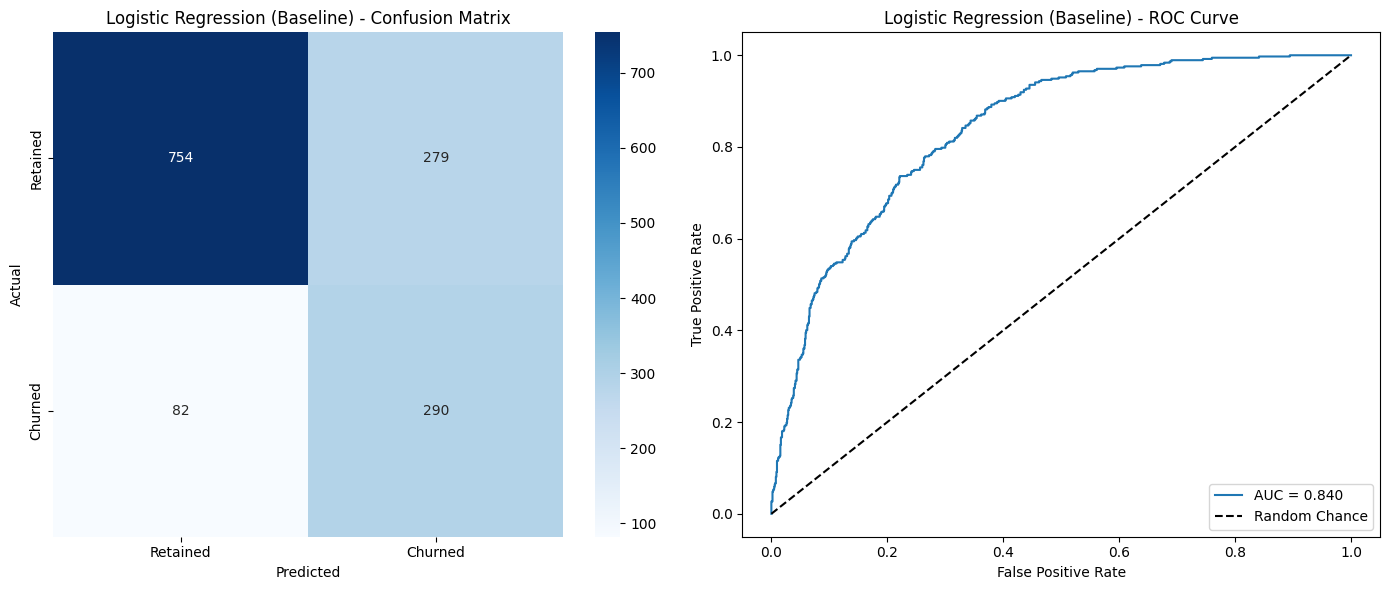

In [5]:
# Get predictions
test_metrics, y_pred, y_prob = evaluate_model_test(baseline_model, X_test, y_test)

print("Test Set Performance:")
metrics_df = pd.DataFrame(test_metrics, index=['Score']).T
display(metrics_df)

# Visualizations
plot_model_performance(y_test, y_pred, y_prob, model_name="Logistic Regression (Baseline)")




### 5. Summary & Next Steps
**Results:**
* **Recall:** [Enter Value, e.g., 0.80] - The baseline is good at catching churners.
* **Precision:** [Enter Value, e.g., 0.52] - But it has many false alarms.
* **AUC-ROC:** [Enter Value, e.g., 0.84] - Good separability.

**Conclusion:**
Logistic Regression provides a strong starting point. The high recall suggests linear relationships (price, contract) are strong predictors. In the next phase, we will train a Random Forest to see if capturing non-linear patterns improves Precision without sacrificing Recall.

In [3]:
import joblib
import pandas as pd
import sys
import os

# Add src to path
sys.path.append(os.path.abspath('..'))
from src.config import PROCESSED_DATA_DIR

# Load training data to get the exact column order
X_train = pd.read_csv(PROCESSED_DATA_DIR / 'X_train.csv')

# Save the column list
model_columns = X_train.columns.tolist()
joblib.dump(model_columns, '../models/model_columns.joblib')

print("✅ Columns saved to models/model_columns.joblib")

✅ Columns saved to models/model_columns.joblib
